In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [3]:
pd.set_option('display.max_columns',None)
df = pd.read_csv('/content/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [4]:
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [5]:
df.shape

(142193, 24)

In [6]:
for i in df.columns:
    print(f' feature {i} has {df[i].unique()} values')
    print('-'*75)

 feature Date has ['2008-12-01' '2008-12-02' '2008-12-03' ... '2008-01-29' '2008-01-30'
 '2008-01-31'] values
---------------------------------------------------------------------------
 feature Location has ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru'] values
---------------------------------------------------------------------------
 feature MinTemp has [13.4  7.4 12.9  9.2 17.5 14.6 14.3  7.7  9.7 13.1 15.9 12.6  9.8 14.1
 13.5 11.2 11.5 17.1 20.5 15.3 16.2 

In [7]:
num_vars = df.select_dtypes(include=['int64','float64']).columns
cat_vars = df.select_dtypes(include=['object']).columns

In [8]:
print(f' num_vars are {num_vars}\n cat_vars are {cat_vars}')

 num_vars are Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RISK_MM'],
      dtype='object')
 cat_vars are Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')


In [9]:
df[num_vars].isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RISK_MM              0
dtype: int64

In [10]:
for i in df[num_vars]:
    df[i+'mean'] = df[i].fillna(df[i].mean())

In [11]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,MinTempmean,MaxTempmean,Rainfallmean,Evaporationmean,Sunshinemean,WindGustSpeedmean,WindSpeed9ammean,WindSpeed3pmmean,Humidity9ammean,Humidity3pmmean,Pressure9ammean,Pressure3pmmean,Cloud9ammean,Cloud3pmmean,Temp9ammean,Temp3pmmean,RISK_MMmean
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No,13.4,22.9,0.6,5.469824,7.624853,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No,7.4,25.1,0.0,5.469824,7.624853,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No,12.9,25.7,0.0,5.469824,7.624853,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No,9.2,28.0,0.0,5.469824,7.624853,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,1.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,17.5,32.3,1.0,5.469824,7.624853,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.2


In [12]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow', 'MinTempmean',
       'MaxTempmean', 'Rainfallmean', 'Evaporationmean', 'Sunshinemean',
       'WindGustSpeedmean', 'WindSpeed9ammean', 'WindSpeed3pmmean',
       'Humidity9ammean', 'Humidity3pmmean', 'Pressure9ammean',
       'Pressure3pmmean', 'Cloud9ammean', 'Cloud3pmmean', 'Temp9ammean',
       'Temp3pmmean', 'RISK_MMmean'],
      dtype='object')

In [13]:
num_vars

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RISK_MM'],
      dtype='object')

In [14]:
mean_num=['MinTempmean',
       'MaxTempmean', 'Rainfallmean', 'Evaporationmean', 'Sunshinemean',
       'WindGustSpeedmean', 'WindSpeed9ammean', 'WindSpeed3pmmean',
       'Humidity9ammean', 'Humidity3pmmean', 'Pressure9ammean',
       'Pressure3pmmean', 'Cloud9ammean', 'Cloud3pmmean', 'Temp9ammean',
       'Temp3pmmean', 'RISK_MMmean']

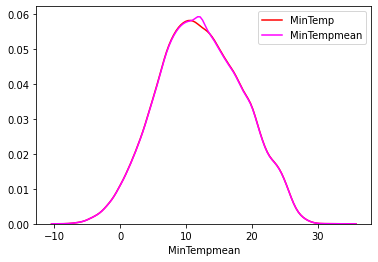

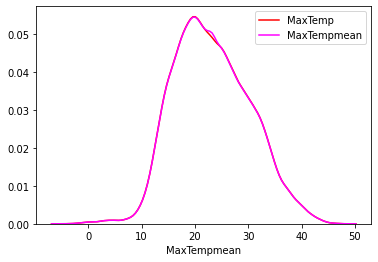

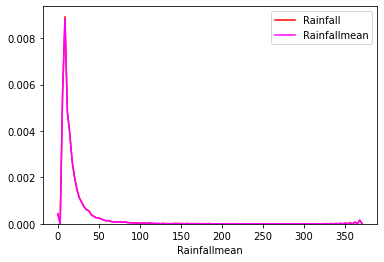

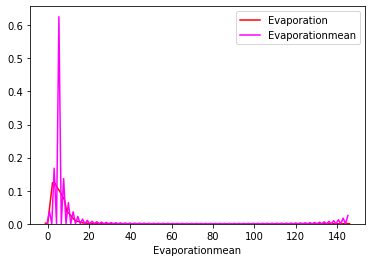

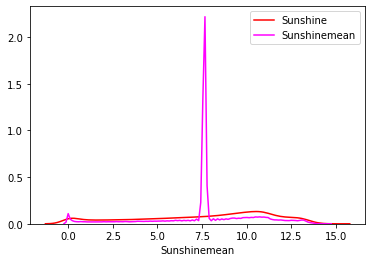

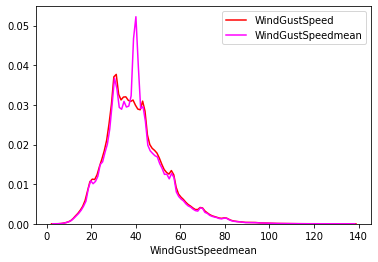

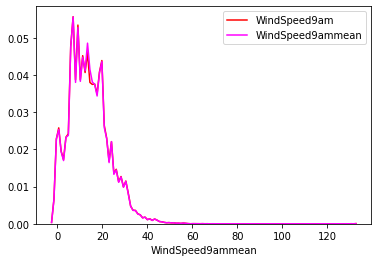

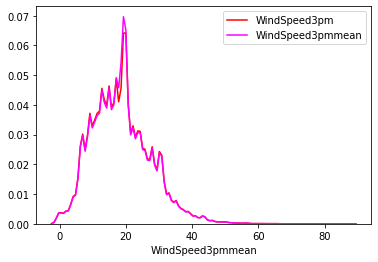

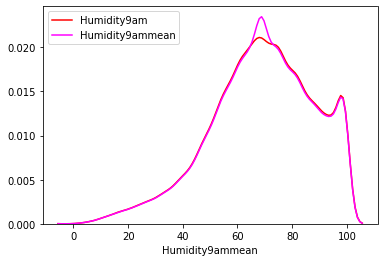

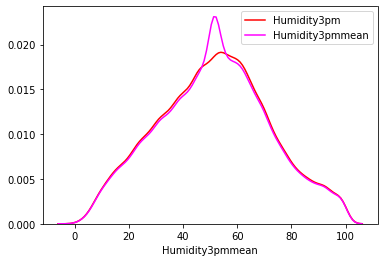

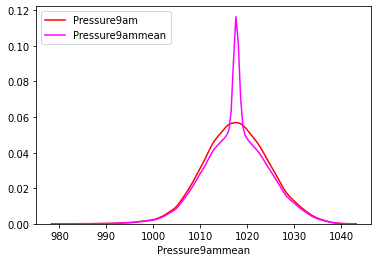

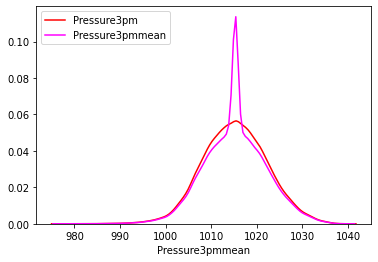

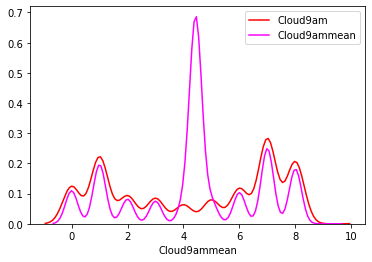

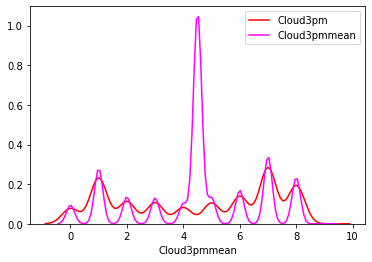

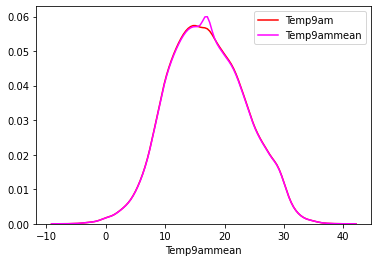

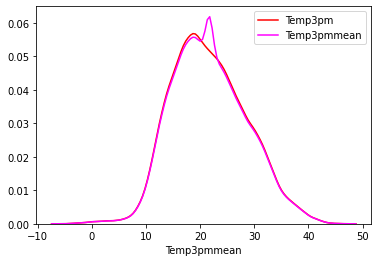

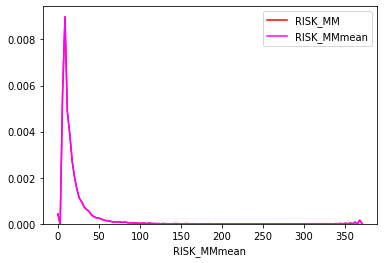

In [15]:
for i,j in zip(num_vars,mean_num):
    sn.distplot(df[i],label = i,kde = True,hist = False,color = 'red')
    sn.distplot(df[j],label = j,kde=True,hist = False,color='magenta')
    plt.legend()
    plt.show()

In [16]:
num_vars

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RISK_MM'],
      dtype='object')

rainfall,windspeed,humidy,temp,risk

In [17]:
data = df.copy()

In [18]:
data = data.drop(['Rainfall','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Temp9am', 'Temp3pm', 'RISK_MM'],axis = 1)
data.isnull().sum()

Date                     0
Location                 0
MinTemp                637
MaxTemp                322
Evaporation          60843
Sunshine             67816
WindGustDir           9330
WindGustSpeed         9270
WindDir9am           10013
WindDir3pm            3778
Pressure9am          14014
Pressure3pm          13981
Cloud9am             53657
Cloud3pm             57094
RainToday             1406
RainTomorrow             0
MinTempmean              0
MaxTempmean              0
Rainfallmean             0
Evaporationmean          0
Sunshinemean             0
WindGustSpeedmean        0
WindSpeed9ammean         0
WindSpeed3pmmean         0
Humidity9ammean          0
Humidity3pmmean          0
Pressure9ammean          0
Pressure3pmmean          0
Cloud9ammean             0
Cloud3pmmean             0
Temp9ammean              0
Temp3pmmean              0
RISK_MMmean              0
dtype: int64

In [19]:
mean_num

['MinTempmean',
 'MaxTempmean',
 'Rainfallmean',
 'Evaporationmean',
 'Sunshinemean',
 'WindGustSpeedmean',
 'WindSpeed9ammean',
 'WindSpeed3pmmean',
 'Humidity9ammean',
 'Humidity3pmmean',
 'Pressure9ammean',
 'Pressure3pmmean',
 'Cloud9ammean',
 'Cloud3pmmean',
 'Temp9ammean',
 'Temp3pmmean',
 'RISK_MMmean']

In [20]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday',
       'RainTomorrow', 'MinTempmean', 'MaxTempmean', 'Rainfallmean',
       'Evaporationmean', 'Sunshinemean', 'WindGustSpeedmean',
       'WindSpeed9ammean', 'WindSpeed3pmmean', 'Humidity9ammean',
       'Humidity3pmmean', 'Pressure9ammean', 'Pressure3pmmean', 'Cloud9ammean',
       'Cloud3pmmean', 'Temp9ammean', 'Temp3pmmean', 'RISK_MMmean'],
      dtype='object')

In [21]:
median_list = ['Evaporation', 'Sunshine','WindGustSpeed','Pressure9am', 'Pressure3pm','Cloud9am', 'Cloud3pm']

In [22]:
for i in median_list:
    data[i+'median'] = data[i].fillna(data[i].median())

In [23]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday',
       'RainTomorrow', 'MinTempmean', 'MaxTempmean', 'Rainfallmean',
       'Evaporationmean', 'Sunshinemean', 'WindGustSpeedmean',
       'WindSpeed9ammean', 'WindSpeed3pmmean', 'Humidity9ammean',
       'Humidity3pmmean', 'Pressure9ammean', 'Pressure3pmmean', 'Cloud9ammean',
       'Cloud3pmmean', 'Temp9ammean', 'Temp3pmmean', 'RISK_MMmean',
       'Evaporationmedian', 'Sunshinemedian', 'WindGustSpeedmedian',
       'Pressure9ammedian', 'Pressure3pmmedian', 'Cloud9ammedian',
       'Cloud3pmmedian'],
      dtype='object')

In [24]:
to_list = ['Evaporationmedian', 'Sunshinemedian',
       'WindGustSpeedmedian', 'Pressure9ammedian', 'Pressure3pmmedian',
       'Cloud9ammedian', 'Cloud3pmmedian']


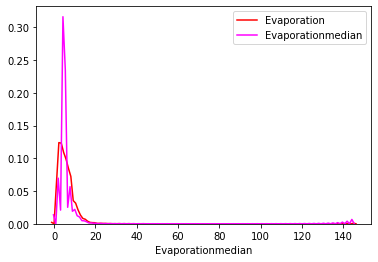

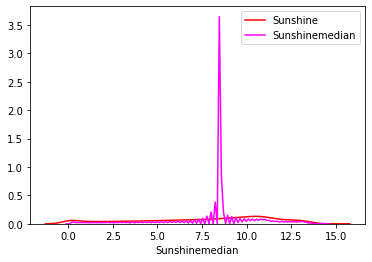

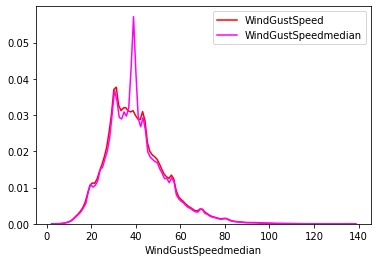

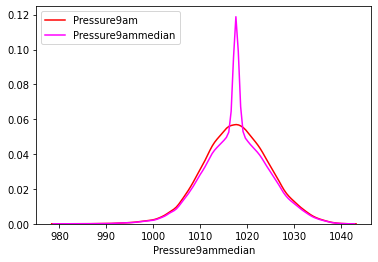

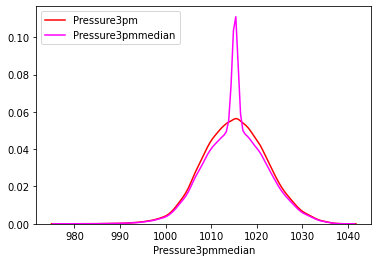

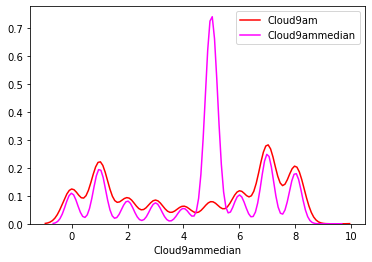

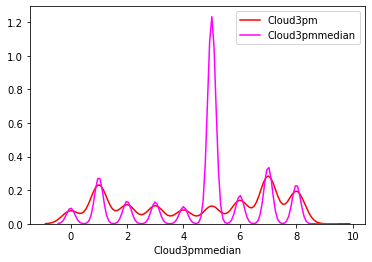

In [25]:
for i,j in zip(median_list,to_list):
    sn.distplot(data[i],kde = True,hist = False,label = i,color = 'red')
    sn.distplot(data[j],kde = True,hist = False,label = j,color = 'magenta')
    plt.legend()
    plt.show()

In [26]:
for i in to_list:
    data.drop(i,axis = 1,inplace=True)

In [27]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday',
       'RainTomorrow', 'MinTempmean', 'MaxTempmean', 'Rainfallmean',
       'Evaporationmean', 'Sunshinemean', 'WindGustSpeedmean',
       'WindSpeed9ammean', 'WindSpeed3pmmean', 'Humidity9ammean',
       'Humidity3pmmean', 'Pressure9ammean', 'Pressure3pmmean', 'Cloud9ammean',
       'Cloud3pmmean', 'Temp9ammean', 'Temp3pmmean', 'RISK_MMmean'],
      dtype='object')

def compute(data,i):
    random_sample = data[i].dropna().sample(data[i].isnull().sum(),random_state = 0)
    random_sample.index = data[data[i].isnull()].index
    
    data.loc[data[i].isnull(),i+'random_sample'] = random_sample

In [28]:
num_vars

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RISK_MM'],
      dtype='object')

In [29]:
data.head()

,Date,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,MinTempmean,MaxTempmean,Rainfallmean,Evaporationmean,Sunshinemean,WindGustSpeedmean,WindSpeed9ammean,WindSpeed3pmmean,Humidity9ammean,Humidity3pmmean,Pressure9ammean,Pressure3pmmean,Cloud9ammean,Cloud3pmmean,Temp9ammean,Temp3pmmean,RISK_MMmean
0,2008-12-01,Albury,13.4,22.9,NaN,NaN,W,44.0,W,WNW,1007.7,1007.1,8.0,NaN,No,No,13.4,22.9,0.6,5.469824,7.624853,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,0.0
1,2008-12-02,Albury,7.4,25.1,NaN,NaN,WNW,44.0,NNW,WSW,1010.6,1007.8,NaN,NaN,No,No,7.4,25.1,0.0,5.469824,7.624853,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,0.0
2,2008-12-03,Albury,12.9,25.7,NaN,NaN,WSW,46.0,W,WSW,1007.6,1008.7,NaN,2.0,No,No,12.9,25.7,0.0,5.469824,7.624853,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,0.0
3,2008-12-04,Albury,9.2,28.0,NaN,NaN,NE,24.0,SE,E,1017.6,1012.8,NaN,NaN,No,No,9.2,28.0,0.0,5.469824,7.624853,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,1.0
4,2008-12-05,Albury,17.5,32.3,NaN,NaN,W,41.0,ENE,NW,1010.8,1006.0,7.0,8.0,No,No,17.5,32.3,1.0,5.469824,7.624853,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.2


In [30]:
num_vars = data.select_dtypes(include=['int64','float64']).columns
num_vars

Index(['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 'WindGustSpeed',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'MinTempmean',
       'MaxTempmean', 'Rainfallmean', 'Evaporationmean', 'Sunshinemean',
       'WindGustSpeedmean', 'WindSpeed9ammean', 'WindSpeed3pmmean',
       'Humidity9ammean', 'Humidity3pmmean', 'Pressure9ammean',
       'Pressure3pmmean', 'Cloud9ammean', 'Cloud3pmmean', 'Temp9ammean',
       'Temp3pmmean', 'RISK_MMmean'],
      dtype='object')

In [31]:
del_list = ['Evaporation', 'Sunshine', 'WindGustSpeed', 'Pressure9am']
for i in del_list:
    data.drop(i,inplace = True,axis = 1)

In [32]:
data.head()

,Date,Location,MinTemp,MaxTemp,WindGustDir,WindDir9am,WindDir3pm,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,MinTempmean,MaxTempmean,Rainfallmean,Evaporationmean,Sunshinemean,WindGustSpeedmean,WindSpeed9ammean,WindSpeed3pmmean,Humidity9ammean,Humidity3pmmean,Pressure9ammean,Pressure3pmmean,Cloud9ammean,Cloud3pmmean,Temp9ammean,Temp3pmmean,RISK_MMmean
0,2008-12-01,Albury,13.4,22.9,W,W,WNW,1007.1,8.0,NaN,No,No,13.4,22.9,0.6,5.469824,7.624853,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,0.0
1,2008-12-02,Albury,7.4,25.1,WNW,NNW,WSW,1007.8,NaN,NaN,No,No,7.4,25.1,0.0,5.469824,7.624853,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,0.0
2,2008-12-03,Albury,12.9,25.7,WSW,W,WSW,1008.7,NaN,2.0,No,No,12.9,25.7,0.0,5.469824,7.624853,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,0.0
3,2008-12-04,Albury,9.2,28.0,NE,SE,E,1012.8,NaN,NaN,No,No,9.2,28.0,0.0,5.469824,7.624853,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,1.0
4,2008-12-05,Albury,17.5,32.3,W,ENE,NW,1006.0,7.0,8.0,No,No,17.5,32.3,1.0,5.469824,7.624853,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.2


In [33]:
del_list = ['Pressure3pm', 'Cloud9am', 'Cloud3pm']
for i in del_list:
    data.drop(i,inplace = True,axis = 1)

In [34]:
data.head(2)

,Date,Location,MinTemp,MaxTemp,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,MinTempmean,MaxTempmean,Rainfallmean,Evaporationmean,Sunshinemean,WindGustSpeedmean,WindSpeed9ammean,WindSpeed3pmmean,Humidity9ammean,Humidity3pmmean,Pressure9ammean,Pressure3pmmean,Cloud9ammean,Cloud3pmmean,Temp9ammean,Temp3pmmean,RISK_MMmean
0,2008-12-01,Albury,13.4,22.9,W,W,WNW,No,No,13.4,22.9,0.6,5.469824,7.624853,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,0.0
1,2008-12-02,Albury,7.4,25.1,WNW,NNW,WSW,No,No,7.4,25.1,0.0,5.469824,7.624853,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,0.0


In [35]:
cat_vars = data.select_dtypes(include=['object']).columns
cat_vars

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [36]:
for i in cat_vars:
    print(f' feature {i} has {data[i].unique()} values')
    print('-'*75)

 feature Date has ['2008-12-01' '2008-12-02' '2008-12-03' ... '2008-01-29' '2008-01-30'
 '2008-01-31'] values
---------------------------------------------------------------------------
 feature Location has ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru'] values
---------------------------------------------------------------------------
 feature WindGustDir has ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 nan 'E' 'SSW'] values
-----

In [37]:
data[cat_vars].isnull().sum()

Date                0
Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

In [38]:
for i in data[cat_vars]:
    print(f' feature {i} has {data[i].value_counts()} value counts')
    print('-'*75)

 feature Date has 2014-05-27    49
2016-07-03    49
2014-09-01    49
2013-11-27    49
2013-12-14    49
              ..
2007-12-18     1
2007-12-27     1
2007-11-24     1
2007-12-03     1
2007-11-23     1
Name: Date, Length: 3436, dtype: int64 value counts
---------------------------------------------------------------------------
 feature Location has Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Ballarat            3028
Launceston          3028
Albany              3016
Albury              3011
PerthAirport        3009
MelbourneAirport    3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              

In [39]:
data['WindGustDir'] = data['WindGustDir'].fillna('unkown')

In [40]:
data['WindDir9am'] = data['WindDir9am'].fillna('unkown')
data['WindDir3pm'] = data['WindDir3pm'].fillna('unkown')

In [41]:
data[cat_vars].isnull().sum()

Date               0
Location           0
WindGustDir        0
WindDir9am         0
WindDir3pm         0
RainToday       1406
RainTomorrow       0
dtype: int64

In [42]:
data.isnull().sum()

Date                    0
Location                0
MinTemp               637
MaxTemp               322
WindGustDir             0
WindDir9am              0
WindDir3pm              0
RainToday            1406
RainTomorrow            0
MinTempmean             0
MaxTempmean             0
Rainfallmean            0
Evaporationmean         0
Sunshinemean            0
WindGustSpeedmean       0
WindSpeed9ammean        0
WindSpeed3pmmean        0
Humidity9ammean         0
Humidity3pmmean         0
Pressure9ammean         0
Pressure3pmmean         0
Cloud9ammean            0
Cloud3pmmean            0
Temp9ammean             0
Temp3pmmean             0
RISK_MMmean             0
dtype: int64

In [43]:
data.head()

,Date,Location,MinTemp,MaxTemp,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,MinTempmean,MaxTempmean,Rainfallmean,Evaporationmean,Sunshinemean,WindGustSpeedmean,WindSpeed9ammean,WindSpeed3pmmean,Humidity9ammean,Humidity3pmmean,Pressure9ammean,Pressure3pmmean,Cloud9ammean,Cloud3pmmean,Temp9ammean,Temp3pmmean,RISK_MMmean
0,2008-12-01,Albury,13.4,22.9,W,W,WNW,No,No,13.4,22.9,0.6,5.469824,7.624853,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,0.0
1,2008-12-02,Albury,7.4,25.1,WNW,NNW,WSW,No,No,7.4,25.1,0.0,5.469824,7.624853,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,0.0
2,2008-12-03,Albury,12.9,25.7,WSW,W,WSW,No,No,12.9,25.7,0.0,5.469824,7.624853,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,0.0
3,2008-12-04,Albury,9.2,28.0,NE,SE,E,No,No,9.2,28.0,0.0,5.469824,7.624853,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,1.0
4,2008-12-05,Albury,17.5,32.3,W,ENE,NW,No,No,17.5,32.3,1.0,5.469824,7.624853,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.2


In [44]:
data = data.drop(['MinTemp','MaxTemp'],axis = 1)

In [45]:
data = data.dropna()

In [46]:
data.isnull().sum()

Date                 0
Location             0
WindGustDir          0
WindDir9am           0
WindDir3pm           0
RainToday            0
RainTomorrow         0
MinTempmean          0
MaxTempmean          0
Rainfallmean         0
Evaporationmean      0
Sunshinemean         0
WindGustSpeedmean    0
WindSpeed9ammean     0
WindSpeed3pmmean     0
Humidity9ammean      0
Humidity3pmmean      0
Pressure9ammean      0
Pressure3pmmean      0
Cloud9ammean         0
Cloud3pmmean         0
Temp9ammean          0
Temp3pmmean          0
RISK_MMmean          0
dtype: int64

In [47]:
data.head(2)

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,MinTempmean,MaxTempmean,Rainfallmean,Evaporationmean,Sunshinemean,WindGustSpeedmean,WindSpeed9ammean,WindSpeed3pmmean,Humidity9ammean,Humidity3pmmean,Pressure9ammean,Pressure3pmmean,Cloud9ammean,Cloud3pmmean,Temp9ammean,Temp3pmmean,RISK_MMmean
0,2008-12-01,Albury,W,W,WNW,No,No,13.4,22.9,0.6,5.469824,7.624853,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,0.0
1,2008-12-02,Albury,WNW,NNW,WSW,No,No,7.4,25.1,0.0,5.469824,7.624853,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,0.0


In [48]:
cat_vars

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [49]:
dummy_list = ['RainToday', 'RainTomorrow']
for i in dummy_list:
    data[i] = pd.get_dummies(data[i])

In [50]:
data.head(2)

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,MinTempmean,MaxTempmean,Rainfallmean,Evaporationmean,Sunshinemean,WindGustSpeedmean,WindSpeed9ammean,WindSpeed3pmmean,Humidity9ammean,Humidity3pmmean,Pressure9ammean,Pressure3pmmean,Cloud9ammean,Cloud3pmmean,Temp9ammean,Temp3pmmean,RISK_MMmean
0,2008-12-01,Albury,W,W,WNW,1,1,13.4,22.9,0.6,5.469824,7.624853,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,0.0
1,2008-12-02,Albury,WNW,NNW,WSW,1,1,7.4,25.1,0.0,5.469824,7.624853,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,0.0


In [51]:
data  = data.drop(['Date','Location'],axis = 1)
data.head(1)

,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,MinTempmean,MaxTempmean,Rainfallmean,Evaporationmean,Sunshinemean,WindGustSpeedmean,WindSpeed9ammean,WindSpeed3pmmean,Humidity9ammean,Humidity3pmmean,Pressure9ammean,Pressure3pmmean,Cloud9ammean,Cloud3pmmean,Temp9ammean,Temp3pmmean,RISK_MMmean
0,W,W,WNW,1,1,13.4,22.9,0.6,5.469824,7.624853,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,4.503167,16.9,21.8,0.0


In [52]:
cat_vars = cat_vars[2:]

In [53]:
cat_vars

Index(['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'], dtype='object')

In [54]:
for i in cat_vars:
    print(f' feature {i} has {data[i].value_counts()} value counts')
    print('='*75)

 feature WindGustDir has W         9696
SE        9241
unkown    9163
E         8985
N         8941
SSE       8905
S         8859
WSW       8802
SW        8702
SSW       8541
WNW       7960
NW        7939
ENE       7924
ESE       7244
NE        7002
NNW       6511
NNE       6372
Name: WindGustDir, dtype: int64 value counts
 feature WindDir9am has N         11266
unkown     9660
SE         9116
E          8977
SSE        8901
NW         8471
S          8424
W          8207
SW         8160
NNE        7877
NNW        7782
ENE        7668
ESE        7518
NE         7477
SSW        7397
WNW        7100
WSW        6786
Name: WindDir9am, dtype: int64 value counts
 feature WindDir3pm has SE        10578
W          9810
S          9488
WSW        9231
SW         9104
SSE        9038
N          8593
WNW        8564
NW         8394
ESE        8311
E          8272
NE         8107
SSW        7945
NNW        7664
ENE        7645
NNE        6373
unkown     3670
Name: WindDir3pm, dtype: int64 value co

In [55]:
mean_map = []
data.groupby(['WindGustDir'])['RainTomorrow'].mean()

WindGustDir
E         0.853422
ENE       0.840989
ESE       0.838487
N         0.731350
NE        0.815053
NNE       0.771343
NNW       0.717708
NW        0.717345
S         0.777966
SE        0.814955
SSE       0.807748
SSW       0.782110
SW        0.799242
W         0.734839
WNW       0.720854
WSW       0.769143
unkown    0.738514
Name: RainTomorrow, dtype: float64

In [56]:
for i in cat_vars:
    mean_map.append(data.groupby([i])['RainTomorrow'].mean())

In [57]:
mean_map


[WindGustDir
 E         0.853422
 ENE       0.840989
 ESE       0.838487
 N         0.731350
 NE        0.815053
 NNE       0.771343
 NNW       0.717708
 NW        0.717345
 S         0.777966
 SE        0.814955
 SSE       0.807748
 SSW       0.782110
 SW        0.799242
 W         0.734839
 WNW       0.720854
 WSW       0.769143
 unkown    0.738514
 Name: RainTomorrow, dtype: float64, WindDir9am
 E         0.855965
 ENE       0.825639
 ESE       0.853551
 N         0.695189
 NE        0.793901
 NNE       0.732766
 NNW       0.691724
 NW        0.723763
 S         0.804725
 SE        0.838635
 SSE       0.822829
 SSW       0.780857
 SW        0.770956
 W         0.740587
 WNW       0.733662
 WSW       0.756116
 unkown    0.814389
 Name: RainTomorrow, dtype: float64, WindDir3pm
 E         0.830996
 ENE       0.823676
 ESE       0.832150
 N         0.722565
 NE        0.812384
 NNE       0.756943
 NNW       0.719990
 NW        0.719919
 S         0.787626
 SE        0.811306
 SSE       

In [58]:
j = 0
for i in cat_vars:
    data[i] = data[i].map(mean_map[j]);j+=1

In [59]:
data.head()

,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,MinTempmean,MaxTempmean,Rainfallmean,Evaporationmean,Sunshinemean,WindGustSpeedmean,WindSpeed9ammean,WindSpeed3pmmean,Humidity9ammean,Humidity3pmmean,Pressure9ammean,Pressure3pmmean,Cloud9ammean,Cloud3pmmean,Temp9ammean,Temp3pmmean,RISK_MMmean
0,0.734839,0.740587,0.724194,0.848132,1,13.4,22.9,0.6,5.469824,7.624853,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,0.0
1,0.720854,0.691724,0.778897,0.848132,1,7.4,25.1,0.0,5.469824,7.624853,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,0.0
2,0.769143,0.740587,0.778897,0.848132,1,12.9,25.7,0.0,5.469824,7.624853,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,0.0
3,0.815053,0.838635,0.830996,0.848132,1,9.2,28.0,0.0,5.469824,7.624853,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,1.0
4,0.734839,0.825639,0.719919,0.848132,1,17.5,32.3,1.0,5.469824,7.624853,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.2


In [60]:
data.columns

Index(['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow',
       'MinTempmean', 'MaxTempmean', 'Rainfallmean', 'Evaporationmean',
       'Sunshinemean', 'WindGustSpeedmean', 'WindSpeed9ammean',
       'WindSpeed3pmmean', 'Humidity9ammean', 'Humidity3pmmean',
       'Pressure9ammean', 'Pressure3pmmean', 'Cloud9ammean', 'Cloud3pmmean',
       'Temp9ammean', 'Temp3pmmean', 'RISK_MMmean'],
      dtype='object')

In [61]:
data.columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow',
       'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RISK_MM']

In [62]:
data.head(2)

,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
0,0.734839,0.740587,0.724194,0.848132,1,13.4,22.9,0.6,5.469824,7.624853,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,0.0
1,0.720854,0.691724,0.778897,0.848132,1,7.4,25.1,0.0,5.469824,7.624853,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,0.0


In [63]:
temp = data.copy()

num_list = ['WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm']
j=0
i=0
while(i<=10):
    data[i+'_avg'] = (data[i]+data[j])*0.5
    i+=2;j+=2

In [64]:
data['Windspeed'] = (data['WindDir9am']+data['WindDir3pm'])*0.5
data['humidity']  = (data['Humidity3pm']+data['Humidity9am'])*0.5
data['Pressure']  = (data['Pressure9am']+data['Pressure3pm'])*0.5
data['Cloud']  = (data['Cloud9am']+data['Cloud3pm'])*0.5
data['Temp']  = (data['Temp9am']+data['Temp3pm'])*0.5

In [65]:
data.head(2)

,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,Windspeed,humidity,Pressure,Cloud,Temp
0,0.734839,0.740587,0.724194,0.848132,1,13.4,22.9,0.6,5.469824,7.624853,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,0.0,0.732391,46.5,1007.4,6.251583,19.35
1,0.720854,0.691724,0.778897,0.848132,1,7.4,25.1,0.0,5.469824,7.624853,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,0.0,0.735311,34.5,1009.2,4.470178,20.75


In [66]:
data = data.drop(['WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],axis = 1)
data.head(2)

,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,RISK_MM,Windspeed,humidity,Pressure,Cloud,Temp
0,0.734839,0.740587,0.724194,0.848132,1,13.4,22.9,0.6,5.469824,7.624853,44.0,0.0,0.732391,46.5,1007.4,6.251583,19.35
1,0.720854,0.691724,0.778897,0.848132,1,7.4,25.1,0.0,5.469824,7.624853,44.0,0.0,0.735311,34.5,1009.2,4.470178,20.75


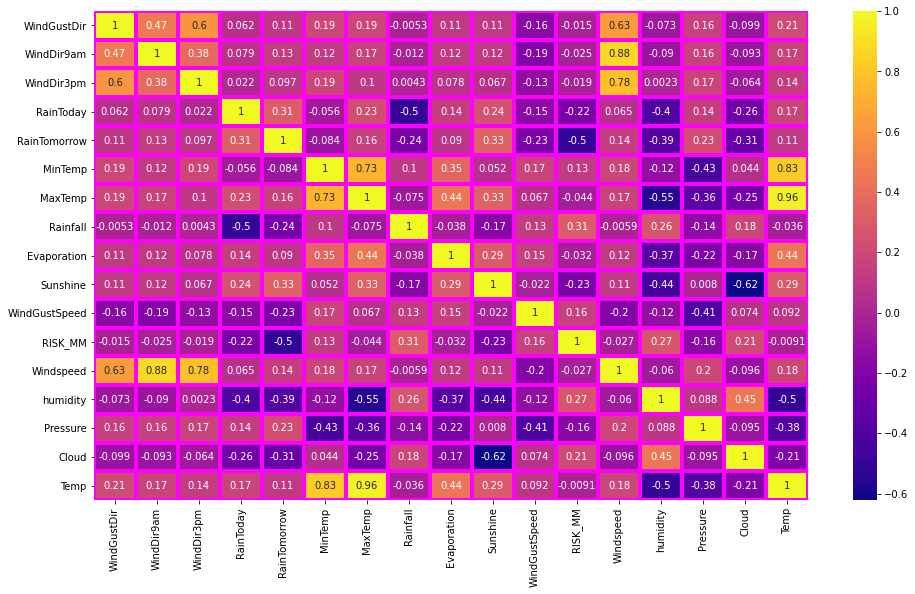

In [67]:
plt.figure(figsize=(16,9))
sn.heatmap(data.corr(),annot=True,linewidths=3,linecolor='magenta',cmap = 'plasma')

In [68]:
data['temperature'] = (data['MinTemp']+data['MaxTemp'])*0.5
data.head(2)

,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,RISK_MM,Windspeed,humidity,Pressure,Cloud,Temp,temperature
0,0.734839,0.740587,0.724194,0.848132,1,13.4,22.9,0.6,5.469824,7.624853,44.0,0.0,0.732391,46.5,1007.4,6.251583,19.35,18.15
1,0.720854,0.691724,0.778897,0.848132,1,7.4,25.1,0.0,5.469824,7.624853,44.0,0.0,0.735311,34.5,1009.2,4.470178,20.75,16.25


In [69]:
data = data.drop(['MinTemp','MaxTemp','Temp'],axis = 1)
data.head(2)

,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Rainfall,Evaporation,Sunshine,WindGustSpeed,RISK_MM,Windspeed,humidity,Pressure,Cloud,temperature
0,0.734839,0.740587,0.724194,0.848132,1,0.6,5.469824,7.624853,44.0,0.0,0.732391,46.5,1007.4,6.251583,18.15
1,0.720854,0.691724,0.778897,0.848132,1,0.0,5.469824,7.624853,44.0,0.0,0.735311,34.5,1009.2,4.470178,16.25


In [70]:
temp = data.copy()

In [71]:
import scipy.stats as stats

In [72]:
def plots(df,var):
    plt.figure(figsize=(10,5))
    plt.subplot(1,3,1)
    plt.hist(df[var],bins = 50)
    
    plt.subplot(1,3,2)
    stats.probplot(df[var],dist='norm',plot=plt)
    
    plt.show()

WindGustDir


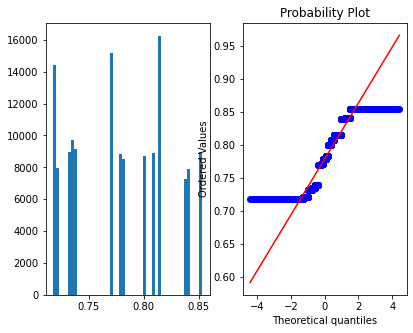

WindDir9am


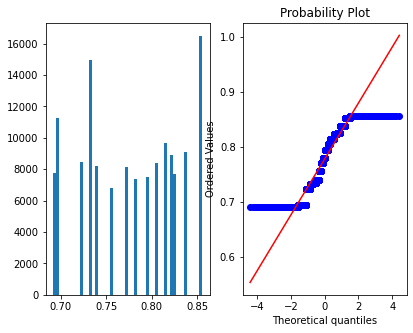

WindDir3pm


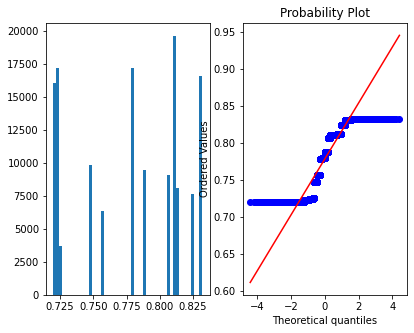

RainToday


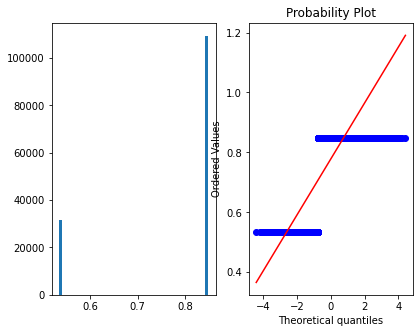

RainTomorrow


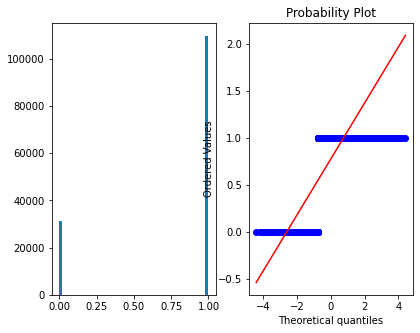

Rainfall


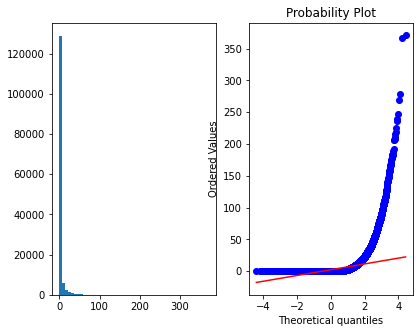

Evaporation


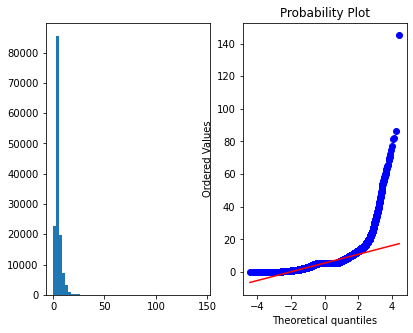

Sunshine


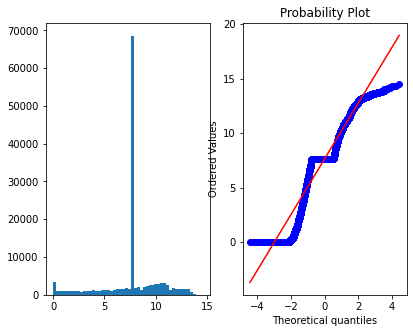

WindGustSpeed


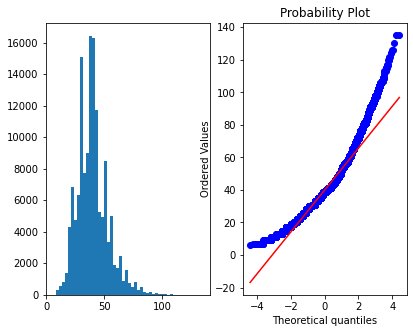

RISK_MM


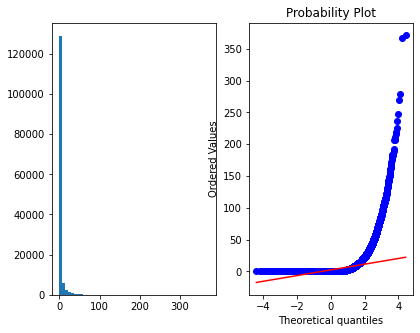

Windspeed


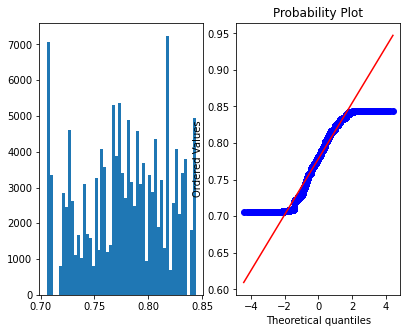

humidity


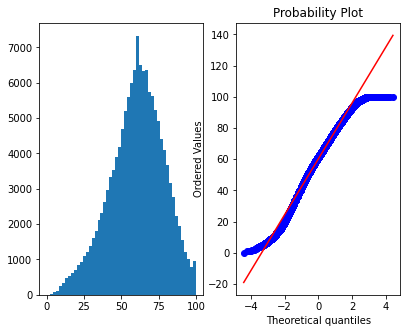

Pressure


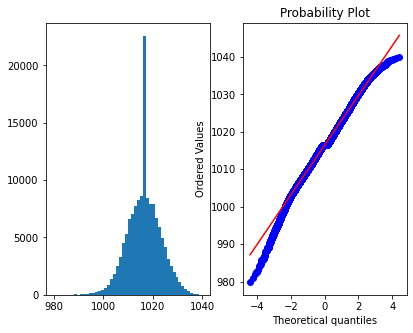

Cloud


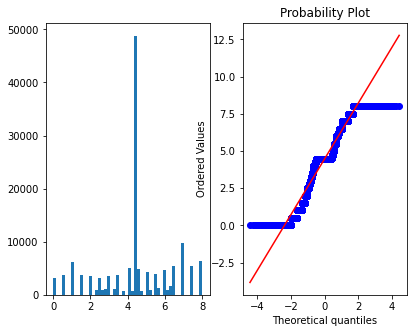

temperature


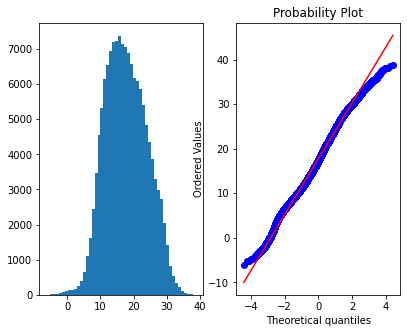

In [73]:
for i in temp.columns:
    print(i)
    plots(temp,i)

In [74]:
data.columns

Index(['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow',
       'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'RISK_MM',
       'Windspeed', 'humidity', 'Pressure', 'Cloud', 'temperature'],
      dtype='object')

In [75]:
upper_limit = []
lower_limit = []
for i in data.columns:
    upper_limit.append(data[i].mean()+(data[i].std())*3)
    lower_limit.append(data[i].mean()-(data[i].std())*3)

In [76]:
upper_limit

[0.9109390069834938,
 0.9367522635926755,
 0.8997791553825072,
 1.1685036596303104,
 2.024392986492375,
 27.745492827189413,
 15.009314525902099,
 15.852014905641877,
 79.36679437782861,
 27.31772735591881,
 0.8951458849879893,
 114.15225206772456,
 1036.4015849840619,
 10.29324665641157,
 36.57170375632436]

In [77]:
j = 0
for i in data.columns:
    temp = data[(data[i]>upper_limit[j]) | (data[i]<lower_limit[j])];j+=1

In [78]:
temp

,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Rainfall,Evaporation,Sunshine,WindGustSpeed,RISK_MM,Windspeed,humidity,Pressure,Cloud,temperature
6261,0.731350,0.695189,0.722565,0.848132,1,0.0,17.000000,8.800000,56.0,0.0,0.708877,9.5,1006.30,3.500000,37.10
7350,0.720854,0.723763,0.724194,0.848132,1,0.0,13.600000,7.624853,52.0,0.0,0.723979,18.0,1002.95,5.000000,36.60
8766,0.717708,0.691724,0.719990,0.848132,1,0.0,5.469824,7.624853,57.0,0.0,0.705857,15.5,1002.20,3.218595,37.25
8792,0.731350,0.691724,0.747299,0.848132,1,0.0,5.469824,7.624853,48.0,0.0,0.719512,13.0,1006.80,4.470178,38.00
13601,0.769143,0.695189,0.724194,0.848132,1,0.0,16.000000,12.000000,61.0,0.0,0.709692,20.5,998.90,3.500000,37.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105832,0.717708,0.793901,0.722565,0.848132,1,0.0,17.200000,7.624853,31.0,0.0,0.758233,15.5,1006.70,1.500000,38.05
105833,0.717708,0.825639,0.722565,0.848132,1,0.0,20.000000,7.624853,43.0,0.0,0.774102,23.5,1007.50,3.751583,37.80
105834,0.807748,0.838635,0.719919,0.848132,1,0.0,16.800000,7.624853,54.0,0.0,0.779277,27.5,1006.20,3.251583,37.00
113509,0.853422,0.695189,0.807008,0.848132,1,0.0,5.469824,12.200000,54.0,0.0,0.751098,16.0,1007.75,4.470178,37.75


In [79]:
j = 0
for i in data.columns:
    temp = data[(data[i]<upper_limit[j]) & (data[i]>lower_limit[j])];j+=1

In [80]:
print(f' original shape: {data.shape}\n after outlier: {temp.shape}')

 original shape: (140787, 15)
 after outlier: (140606, 15)


In [81]:
data = temp.copy()

In [82]:
data.shape

(140606, 15)

In [83]:
data.columns

Index(['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow',
       'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'RISK_MM',
       'Windspeed', 'humidity', 'Pressure', 'Cloud', 'temperature'],
      dtype='object')

In [84]:
box_cox = ['Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'RISK_MM',
       'Windspeed', 'humidity', 'Pressure', 'Cloud']
for i in box_cox:
    data[i],parameters = stats.boxcox(data[i]+1)

Rainfall


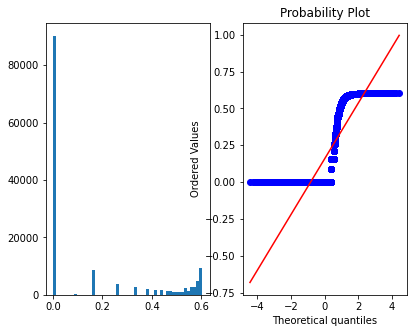

Evaporation


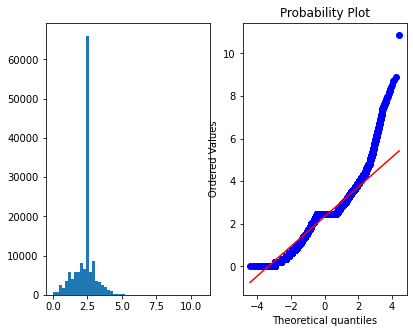

Sunshine


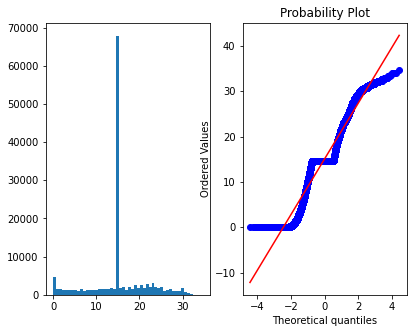

WindGustSpeed


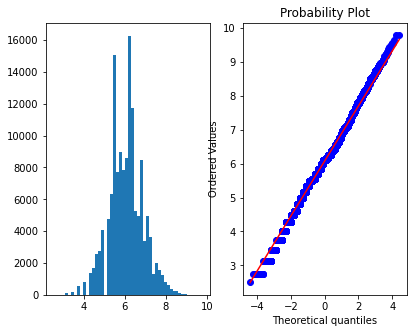

RISK_MM


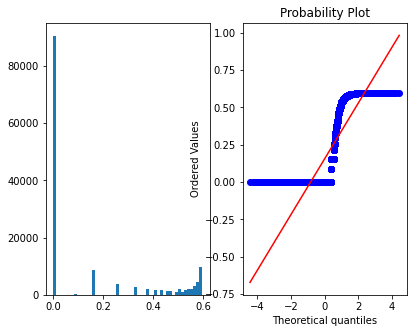

Windspeed


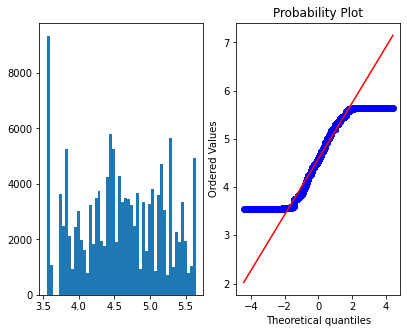

humidity


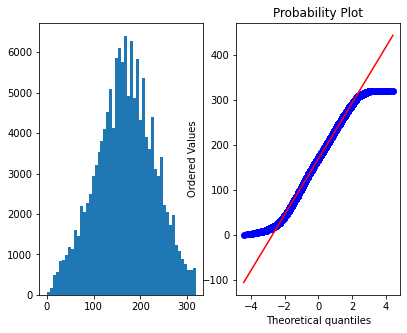

Pressure


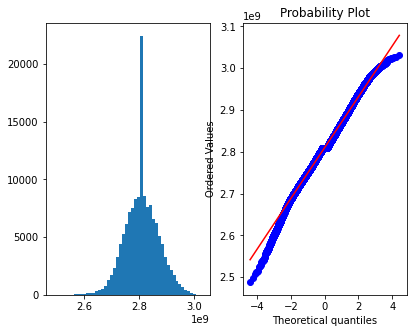

Cloud


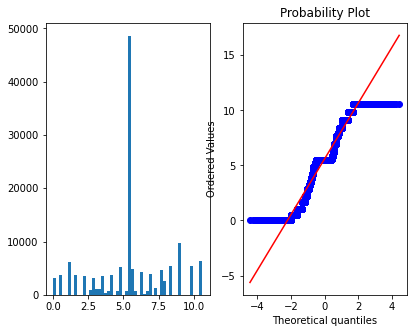

In [85]:
for i in box_cox:
    print(i)
    plots(data,i)

In [86]:
test = data['RainTomorrow']

train = data.drop(['RainTomorrow'],axis = 1)

In [87]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

In [88]:
X_train, X_test, y_train, y_test = train_test_split(train,test,test_size = 0.2)

In [89]:
mm = MinMaxScaler()
X_train_scaled = mm.fit_transform(X_train)
X_test_scaled = mm.transform(X_test)

In [90]:
print(f' training_size : {X_train.shape}\n testing_size : {X_test.shape}')

 training_size : (112484, 14)
 testing_size : (28122, 14)


In [92]:
params = {
    'Randomforest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[int(x) for x in np.linspace(start=1,stop=1200,num = 10)],
            'max_depth':[int(x) for x in np.linspace(start=1,stop=50,num=5)],
            'min_samples_split':[2,5,10,12],
            'min_samples_leaf':[2,5,10,12],
            'ccp_alpha':[0.005,0.010,0.025,0.050,0.075],
            'max_features':['auto','sqrt','log2'],
        }
    },
}
   

In [93]:
scores = []
for model_name,mp in params.items():
    clf = RandomizedSearchCV(mp['model'],param_distributions=mp['params'],cv = 5,return_train_score=False,verbose=2,n_iter=10)
    clf.fit(X_train,y_train)
    scores.append({
        'model_name':model_name,
        'best_score':clf.best_score_,
        'best_estimator':clf.best_estimator_,
    })

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=134, min_samples_split=12, min_samples_leaf=5, max_features=log2, max_depth=1, ccp_alpha=0.05 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=134, min_samples_split=12, min_samples_leaf=5, max_features=log2, max_depth=1, ccp_alpha=0.05, total=   2.5s
[CV] n_estimators=134, min_samples_split=12, min_samples_leaf=5, max_features=log2, max_depth=1, ccp_alpha=0.05 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


[CV]  n_estimators=134, min_samples_split=12, min_samples_leaf=5, max_features=log2, max_depth=1, ccp_alpha=0.05, total=   2.5s
[CV] n_estimators=134, min_samples_split=12, min_samples_leaf=5, max_features=log2, max_depth=1, ccp_alpha=0.05 
[CV]  n_estimators=134, min_samples_split=12, min_samples_leaf=5, max_features=log2, max_depth=1, ccp_alpha=0.05, total=   2.4s
[CV] n_estimators=134, min_samples_split=12, min_samples_leaf=5, max_features=log2, max_depth=1, ccp_alpha=0.05 
[CV]  n_estimators=134, min_samples_split=12, min_samples_leaf=5, max_features=log2, max_depth=1, ccp_alpha=0.05, total=   2.5s
[CV] n_estimators=134, min_samples_split=12, min_samples_leaf=5, max_features=log2, max_depth=1, ccp_alpha=0.05 
[CV]  n_estimators=134, min_samples_split=12, min_samples_leaf=5, max_features=log2, max_depth=1, ccp_alpha=0.05, total=   2.4s
[CV] n_estimators=267, min_samples_split=5, min_samples_leaf=12, max_features=log2, max_depth=50, ccp_alpha=0.01 
[CV]  n_estimators=267, min_samples

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 17.0min finished


 'SVC':{
        'model':SVC(),
        'params':{
            'C':[0.25,0.50,0.75,1.0],
            'tol':[1e-10,1e-5,0.05,0.25,0.50,0.75],
            'kernel':['rbf','linear','poly','sigmoid'],
        }
    },
    'xgboost':{
        'model':XGBClassifier(),
        'params':{
             'n_estimators':[int(x) for x in np.linspace(start=1,stop=1200,num = 10)],
            'learning_rate':[0.25,0.50,0.75,1.0],
            'min_child_weight':[int(x) for x in np.linspace(start = 1,stop=20,num = 5)],
            'booster':['gbtree', 'gblinear','dart'],
            'reg_alpha':[0.025,0.050,0.75,0.50],
        }
    },
    'Gradient_boost':{
        'model':GradientBoostingClassifier(),
        'params':{
                'n_estimators':[int(x) for x in np.linspace(start=1,stop=1200,num = 10)],
                'learning_rate':[0.25,0.50,0.75,1.0],
                'min_samples_split':[1,2,5,10,12],
                'min_samples_leaf':[1,2,5,10,12],
                'max_depth':[int(x) for x in np.linspace(start=1,stop=30,num = 5)],
                'max_features':['auto','sqrt','log2'],
                'ccp_alpha':[0.005,0.010,0.025,0.050,0.075],
                'tol':[1e-10,1e-5,1e-3,0.05,0.25,0.50],
                'learning_rate':[0.25,0.50,0.75,1.0],
                'loss':['deviance', 'exponential'],
                'criterion':['friedman_mse', 'mse', 'mae'],
        }
    }
}


In [94]:
scores_df = pd.DataFrame(scores,columns=['model_name','best_score','best_estimator'])
scores_df

,model_name,best_score,best_estimator
0,Randomforest,1.0,"(DecisionTreeClassifier(ccp_alpha=0.01, class_..."


In [97]:
for i in scores_df:
  print(scores_df[i])
  print('='*75)

0    Randomforest
Name: model_name, dtype: object
0    1.0
Name: best_score, dtype: float64
0    (DecisionTreeClassifier(ccp_alpha=0.01, class_...
Name: best_estimator, dtype: object


In [98]:
clf.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.01, class_weight=None,
                       criterion='gini', max_depth=50, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=267,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [99]:
rf_train = cross_val_score(RandomForestClassifier(bootstrap=True, ccp_alpha=0.01, class_weight=None,
                       criterion='gini', max_depth=50, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=267,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False),X_train,y_train,cv = 10)
rf_test = cross_val_score(RandomForestClassifier(bootstrap=True, ccp_alpha=0.01, class_weight=None,
                       criterion='gini', max_depth=50, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=267,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False),X_test,y_test,cv = 10)

In [100]:
print(f'mean_training_score is :{rf_train.mean()}\n mean_testing_score is : {rf_test.mean()}')

mean_training_score is :1.0
 mean_testing_score is : 1.0


In [101]:
rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.01, class_weight=None,
                       criterion='gini', max_depth=50, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=267,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
rf.fit(X_train,y_train)
rf.score(X_train,y_train)

1.0

In [102]:
predict_train = np.array(train)
predict_list = []
for i in range(0,len(predict_train)):
  predict_list.append(rf.predict([predict_train[i]]))

In [103]:
predict = np.array(predict_list)

In [104]:
data['predicted'] = predict

In [105]:
data.head()

,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Rainfall,Evaporation,Sunshine,WindGustSpeed,RISK_MM,Windspeed,humidity,Pressure,Cloud,temperature,predicted
0,0.734839,0.740587,0.724194,0.848132,1,0.326594,2.452886,14.547615,6.421716,0.000000,3.893848,118.551243,2.727748e+09,8.014629,18.15,1
1,0.720854,0.691724,0.778897,0.848132,1,0.000000,2.452886,14.547615,6.421716,0.000000,3.933303,80.755358,2.743921e+09,5.494505,16.25,1
2,0.769143,0.740587,0.778897,0.848132,1,0.000000,2.452886,14.547615,6.536871,0.000000,4.275969,79.256665,2.734478e+09,3.812054,19.30,1
3,0.815053,0.838635,0.830996,0.848132,1,0.000000,2.452886,14.547615,4.983924,0.410271,5.479841,68.953938,2.798314e+09,5.494505,18.60,1
4,0.734839,0.825639,0.719919,0.848132,1,0.412262,2.452886,14.547615,6.241605,0.157138,4.468259,155.923276,2.736724e+09,9.853654,24.90,1


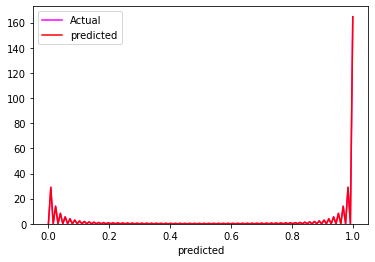

In [106]:
sn.distplot(data['RainTomorrow'],label= 'Actual',color='magenta',kde = True,hist=False)
sn.distplot(data['predicted'],label = 'predicted',color = 'red',kde = True,hist = False)
plt.legend()
plt.show()

In [107]:
compare_list = ['RainTomorrow','predicted']
for i in compare_list:
  print(f' value counts of {i} are : {data[i].value_counts()}')
  print('='*75)

 value counts of RainTomorrow are : 1    109478
0     31128
Name: RainTomorrow, dtype: int64
 value counts of predicted are : 1    109478
0     31128
Name: predicted, dtype: int64


In [108]:
y_pred = rf.predict(X_test)

In [109]:
score = metrics.accuracy_score(y_test,y_pred)

In [110]:
score

1.0

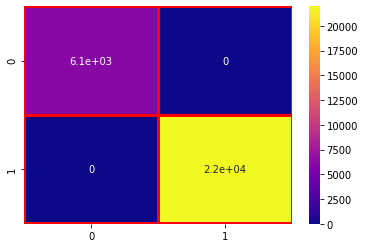

In [111]:
cn = metrics.confusion_matrix(y_test,y_pred)
sn.heatmap(cn,annot=True,linewidths = 2,linecolor='red',cmap = 'plasma')

In [113]:
report = metrics.classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6148
           1       1.00      1.00      1.00     21974

    accuracy                           1.00     28122
   macro avg       1.00      1.00      1.00     28122
weighted avg       1.00      1.00      1.00     28122



In [114]:
mean_map

[WindGustDir
 E         0.853422
 ENE       0.840989
 ESE       0.838487
 N         0.731350
 NE        0.815053
 NNE       0.771343
 NNW       0.717708
 NW        0.717345
 S         0.777966
 SE        0.814955
 SSE       0.807748
 SSW       0.782110
 SW        0.799242
 W         0.734839
 WNW       0.720854
 WSW       0.769143
 unkown    0.738514
 Name: RainTomorrow, dtype: float64, WindDir9am
 E         0.855965
 ENE       0.825639
 ESE       0.853551
 N         0.695189
 NE        0.793901
 NNE       0.732766
 NNW       0.691724
 NW        0.723763
 S         0.804725
 SE        0.838635
 SSE       0.822829
 SSW       0.780857
 SW        0.770956
 W         0.740587
 WNW       0.733662
 WSW       0.756116
 unkown    0.814389
 Name: RainTomorrow, dtype: float64, WindDir3pm
 E         0.830996
 ENE       0.823676
 ESE       0.832150
 N         0.722565
 NE        0.812384
 NNE       0.756943
 NNW       0.719990
 NW        0.719919
 S         0.787626
 SE        0.811306
 SSE       

In [115]:
import pickle

In [116]:
file = open('weather.pkl','wb')
pickle.dump(rf,file)
file.close()